<a href="https://colab.research.google.com/github/anujshetty/SearchAndResQ/blob/main/Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from __future__ import unicode_literals
import time

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display

from Gridworld import Gridworld
from utils import visualize_grid, policy_score, simulate_policy, heatmap, plot_scores

from Learning import QLearningModel, EpsilonGreedyExploration, GreedyPolicy, ValueIterationModel


(10, 10, 4, 3, 3, 3, 6)
[8, 5, 2, 1, 0, 0]


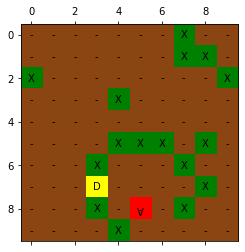

In [ ]:
g_rand = Gridworld(gridworld_length=10, gridworld_width=10, num_obstacles=20,
                 collisionReward= -1, destinationReward= 50, defaultReward= 0, outOfBoundsReward = -0.1, 
                 failChance= 0, gamma= 0.95)
eps_greedy_policy =  EpsilonGreedyExploration(g_rand, 0.6, alpha=0.9)
qlearning_model = QLearningModel(g_rand, 0.2)
print(qlearning_model.Q.shape)
visualize_grid(g_rand)
print(g_rand.state)

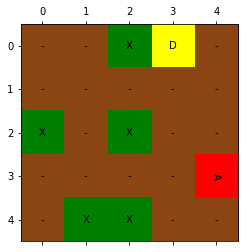

In [ ]:
g_rand.reset_position()
visualize_grid(g_rand)

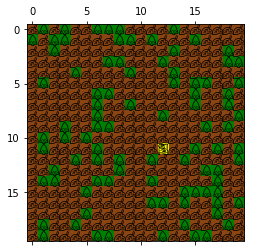

In [ ]:
scores = [] 
for i in range(100000):
    g_rand.reset_position()
    score = simulate_policy(g_rand, model=qlearning_model, policy=eps_greedy_policy, 
                    run_to_completion=False, num_steps=50, visualize=False)
    scores.append(score)
visualize_grid(g_rand)


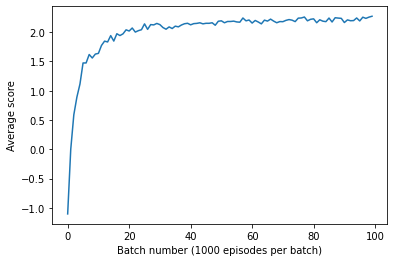

In [ ]:
plot_scores(scores)

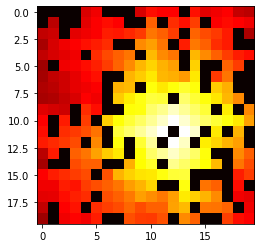

In [ ]:
heatmap(qlearning_model.Q)

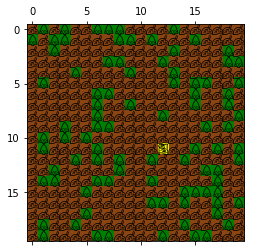

In [ ]:
visualize_grid(g_rand)

In [ ]:
learned_policy = GreedyPolicy(qlearning_model.extract_policy(), g_rand,qlearning_model)
print(learned_policy.policy)

AttributeError: ignored

In [ ]:
# reset agent position in existing grid
g_rand.reset_position()

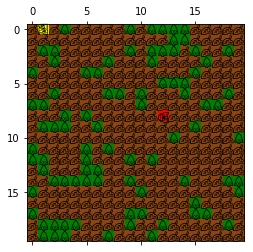

In [ ]:
visualize_grid(g_rand)

33


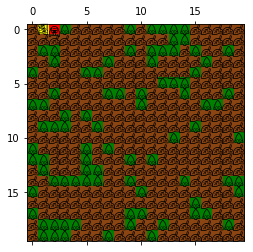

In [ ]:
policy_score_learned = simulate_policy(g_rand, model=None, policy=learned_policy, run_to_completion=True)

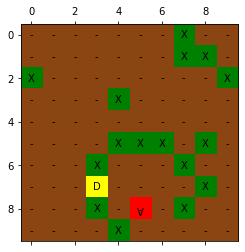

In [ ]:
visualize_grid(g_rand)

In [ ]:
print(policy_score_learned)

0.9201295511778791


# Value Iteration

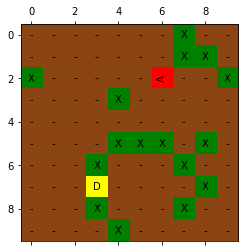

In [46]:
g_rand.reset_position()
visualize_grid(g_rand)

In [47]:
value_model = ValueIterationModel(g_rand, maxIter=1000, residual = 0.0001)
value_model.value_update()

50.0
47.5
45.125
0.0


True

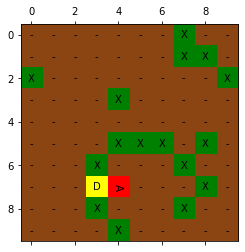

In [48]:

policy_score_learned = simulate_policy(g_rand, model=value_model, policy=GreedyPolicy(g_rand), run_to_completion=True)

In [ ]:
U = value_model.U
for i in U:
  for j in i:
    print(j)

[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]
[-1.99981422 -1.99981422 -1.99981422 -1.99981422]


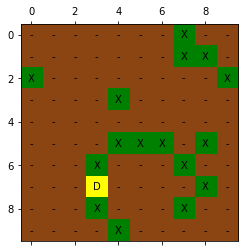

In [49]:
visualize_grid(g_rand)